In [18]:
import paretofront as pf
fd = pf.frontdata()
fd.load_csv("data/debmdk3m500n-tsne.csv")
embeddings = fd.get_nparray("y_")
target = fd.get_nparray("mu")
print(embeddings.shape)
print(target.shape)

(500, 2)
(500,)


([], <a list of 0 Text yticklabel objects>)

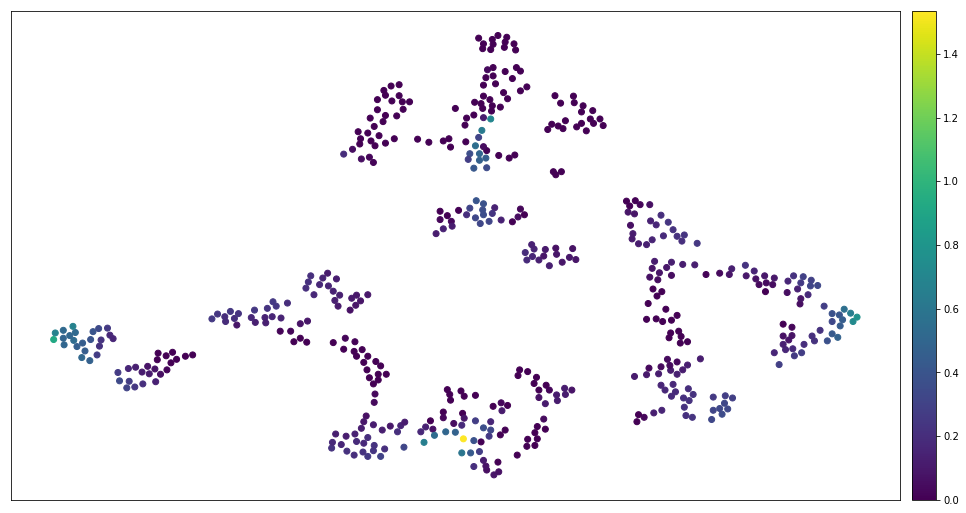

In [19]:
rcParams["figure.figsize"] = (17, 9)
scatter(embeddings[:, 0], embeddings[:, 1], c = target)
my_colorbar = colorbar(fraction = 0.05, pad = 0.0125)
xticks([]); yticks([])

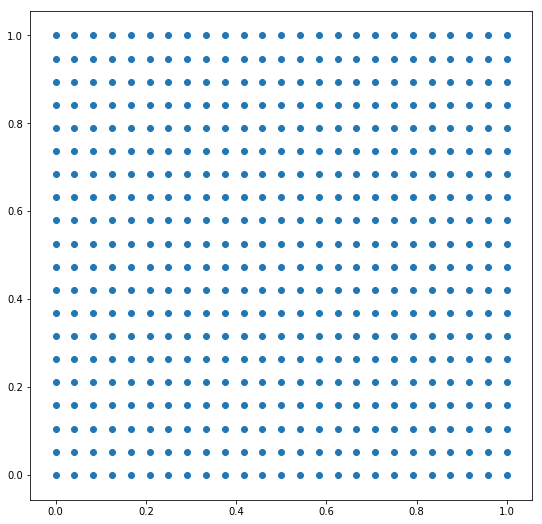

In [20]:
from scipy.spatial.distance import cdist
nrow = 25
ncol = 20
grid = dstack(meshgrid(linspace(0, 1, nrow), linspace(0, 1, ncol))).reshape(-1, 2)
rcParams["figure.figsize"] = (9, 9)
scatter(grid[:,0], grid[:,1])

In [21]:
from lapjv import lapjv

cost_matrix = cdist(grid, embeddings, "sqeuclidean").astype(float32)
cost_matrix = cost_matrix * (100000 / cost_matrix.max())
%time row_asses, col_asses, _ = lapjv(cost_matrix)

CPU times: user 29.3 ms, sys: 301 µs, total: 29.6 ms
Wall time: 29.4 ms


([], <a list of 0 Text yticklabel objects>)

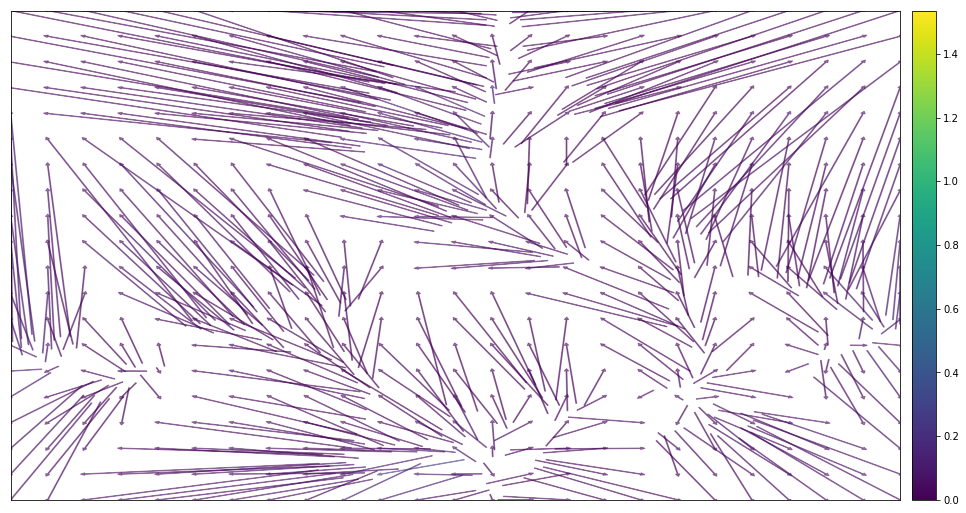

In [22]:
grid_jv = grid[col_asses]
pp_cmap = cm.get_cmap(rcParams["image.cmap"])
rcParams["figure.figsize"] = (17, 9)
for start, end, t in zip(embeddings, grid_jv, target):
    arrow(start[0], start[1], end[0] - start[0], end[1] - start[1],
          head_length=0.005, head_width=0.005, color=pp_cmap(t / 9), alpha=0.5)
colorbar(my_colorbar.mappable, fraction=0.05, pad = 0.0125)
xticks([]); yticks([])

In [ ]:
from PIL import Image

rcParams["figure.figsize"] = (16, 16)
gca().set_facecolor("black")
for pos, img in zip(grid_jv, data):
    img = Image.fromarray(255 - img.reshape(28, 28)).resize((20, 20), Image.ANTIALIAS)
    ab = AnnotationBbox(OffsetImage(img, cmap="Greys"),
                        pos * (size - 1) * 28, xycoords="data", frameon=False, box_alignment=(0, 0))
    gca().add_artist(ab)
xlim(0, (size - 1) * 28 + 16); ylim(0, (size - 1) * 28 + 16)
xticks([]); yticks([])